<a href="https://colab.research.google.com/github/Preritp2/Book_Recommendation_System_Capstone_Project_4/blob/main/Book_Recommendation_System_Prerit_Tyagi_Capstone_Project_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>**BOOK RECOMMENDATION SYSTEM**</u></b>


#**Problem Statement**



During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such
web services, recommender systems have taken more and more place in our lives. From
e-commerce (suggest to buyers articles that could interest them) to online advertisement
(suggest to users the right contents, matching their preferences), recommender systems are
today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant
items to users (items being movies to watch, text to read, products to buy, or anything else
depending on industries).

Recommender systems are really critical in some industries as they can generate a huge
amount of income when they are efficient or also be a way to stand out significantly from
competitors. The main objective is to create a book recommendation system for users.

#**The Data**

**The Book-Crossing dataset comprises 3 files.**

**● Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

**● Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title, Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S,Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.

**● Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

#**Goal**
**The main objective is to create a book recommendation system for users.**

#**Project Work flow**

1.Importing Libraries

2.Loading the Datasets

3.Exploratory Data Analysis

3.1 Users Dataset

3.2 Books Dataset

3.3 Ratings Dataset

4.Merging all Datasets

5.Popularity Based Filtering

6.Collaborative Filtering Recommender

6.1 Model Based Approach

6.2 Memory Based Approach

8.Evaluating Results

Conclusion

#**1. Importing libraries**

In [ ]:
# Importing all required libraries

import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy
import math
import sklearn
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import os
import re
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# To supress the warning messages

import warnings
warnings.filterwarnings('ignore')


#**2. Loading the Datasets**

##Loading Users data.

In [ ]:
# Loading Users data and creating dataframe
users = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Prerit Tyagi/Copy of Users.csv')

In [ ]:
# Printing first 5 rows of users dataframe

users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


**In our users dataset, there are three features; User_ID, Location and Age.**




In [ ]:
# Let's see datatypes of all columns

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


**Two numeric columns and one object column.**

#**Loading Books data**

In [ ]:
# Loading Books data

books = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Prerit Tyagi/Copy of Books.csv')

In [ ]:
# Let's see first 4 rows of books dataset

books.head(4)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...


**In our books dataset, there are 8 features; 'ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'.**

In [ ]:
# Let's see datatypes of all columns

books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


**All columns are of object data type.**

#**Loading Ratings data**

In [ ]:
# Ratings data

ratings = pd.read_csv('/content/drive/MyDrive/Book Recommendation System - Prerit Tyagi/Copy of Ratings.csv')

In [ ]:
# Let's see first 5 rows of ratings dataset

ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


**In our ratings dataset, there are three features; User_ID, ISBN and Book_Rating.**

In [ ]:
# Let's see datatypes of all columns

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


**Two numeric columns and one object column**

#**Dimension of all three datasets**

In [ ]:
print(f'''\t  Book_df shape is {books.shape}
          Ratings_df shape is {ratings.shape}
          Users_df shape is {users.shape}''')

	  Book_df shape is (271360, 8)
          Ratings_df shape is (1149780, 3)
          Users_df shape is (278858, 3)


#**3. Exploratory Data Analysis**

##**3.1 Users Dataset**

###**Let's check for null values.**

In [ ]:
# Function to find %age of missing values

def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100),2)
    mz_table=pd.concat([mis_val,mis_val_percent],axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name:'col_name',0:'Missing Values',1:'% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values('% of Total Values',ascending=False)
    return mz_table.reset_index()

In [24]:
# Finding %age of null values

missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


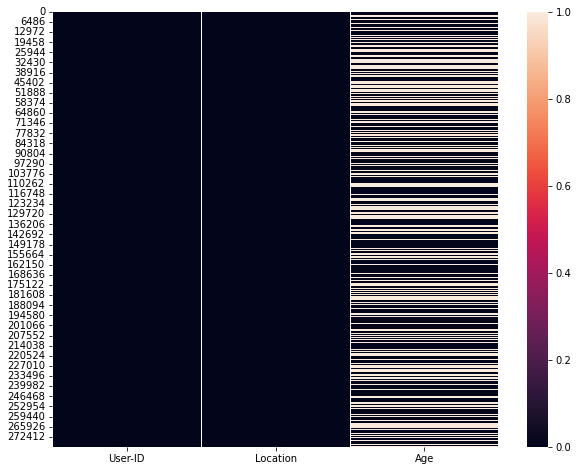

In [25]:
# plotting heat map of null values

fig,axes=plt.subplots(1,1,figsize=(10,8))
sns.heatmap(users.isna())
plt.show()

**Age column has around 40% null values.**

###**Let's check the distribution of Age column.**

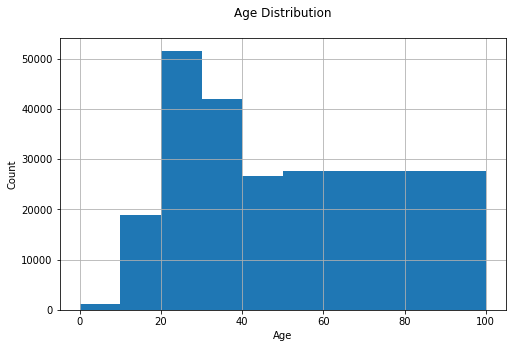

In [26]:
# Histplot showing distribution of age

plt.figure(figsize=(8,5))
users.Age.hist(bins=[0, 10, 20, 30, 40, 50, 100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Majority of users are from age bracket 20-30 years**

###**Let's check for outliers in Age column.**

Text(0.5, 1.0, 'Boxplot of Age column')

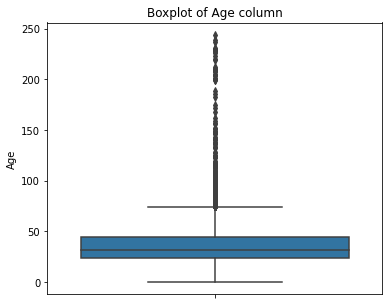

In [27]:
# Plotting boxplot for age column

plt.figure(figsize=(6,5))
sns.boxplot(y='Age', data=users)
plt.title('Boxplot of Age column')

In [28]:
# Descriptive stats of Age column

users.Age.describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

**From boxplot as well as descriptive stats, it is clear that maximum value of age is 244.
So, there are outliers in Age column.**

##**Let's clean Age column**

Text(0.5, 1.0, 'Age Distribution Plot')

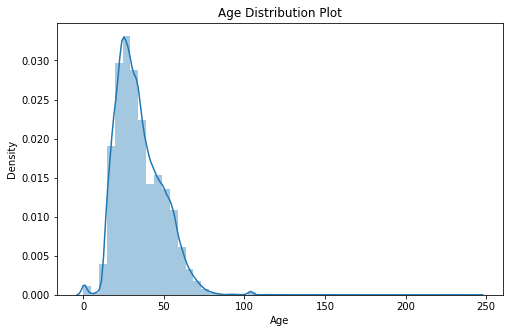

In [29]:
# Displot of Age column

plt.figure(figsize=(8,5))
sns.distplot(users.Age)
plt.title('Age Distribution Plot')

**Age below 5 and above 100 do not make much sense for our book rating case.**

**So, we can replace these by NaNs.**

In [30]:
# Replacing outlier data with NaN

users.loc[(users.Age > 100) | (users.Age < 5), 'Age'] = np.nan

**Replacing NaN values with mean**

In [31]:
# Replacing Nan values with mean

users.Age = users.Age.fillna(users.Age.mean())

In [32]:
# Let's see total no of null values again

users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

#####**Great! We have cleaned our Age column.**

###**Let's see unique values in location column.**

In [33]:
# Printing unique values of location column

users['Location'].unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

**Location column contains some special characters.**

**Let's clean this column and also create a new column 'Country'**

In [34]:
# Creating column Country

for i in users:
    users['Country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

#####**Now we can drop Location column**

In [35]:
# dropping location column

users.drop('Location',axis=1,inplace=True)

In [36]:
# Converting location column into string datatype

users['Country']=users['Country'].astype('str')

In [37]:
# Extracting elements of Country column

a=list(users.Country.unique())
a=set(a)
a=list(a)
a = [x for x in a if x is not None]
a.sort()
print(a)

['', '01776', '02458', '19104', '23232', '30064', '85021', '87510', '_ brasil', 'a', 'aaa', 'adsgfdr', 'afghanistan', 'ahrensburg', 'alachua', 'albania', 'alderney', 'algeria', 'algérie', 'allen', 'ama lurra', 'america', 'american samoa', 'andorra', 'angola', 'antarctica', 'aotearoa', 'argentina', 'armenia', 'aroostook', 'aruba', 'asturies', 'auckland', 'austbritania', 'australia', 'australii', 'austria', 'autralia', 'az', 'azerbaijan', 'bademn würtemberg', 'bahamas', 'bahrain', 'baltimore', 'bangladesh', 'barbados', 'basilicata', 'basque country', 'bavaria', 'baxter', 'bbbzzzzz', 'belarus', 'belgi', 'belgique', 'belgium', 'belize', 'bell', 'benin', 'berguedà', 'bermuda', 'bernalillo', 'bfe', 'bhutan', 'bih', 'bkk', 'bladen', 'bolivia', 'bosnia', 'botswana', 'brasil', 'brazil', 'brunei', 'brunei darussalam', 'bucks', 'bulgaria', 'buncombe', 'burkina faso', 'burkinafasu', 'burlington', 'burma', 'butler', 'c', 'cadd0', 'calabria', 'california', 'cambodia', 'camden', 'cameroon', 'can', 'c

#####**Here, we can see that some data has misspellings. So, let's correct them.**

In [38]:
# Replacing incorrect words with correct one

users['Country'].replace(['','01776','02458','19104','23232','30064','85021','87510','alachua','america','austria','autralia','cananda','geermany','italia','united kindgonm','united sates','united staes','united state','united states','us'],
                           ['other','usa','usa','usa','usa','usa','usa','usa','usa','usa','australia','australia','canada','germany','italy','united kingdom','usa','usa','usa','usa','usa'],inplace=True)


Text(0.5, 1.0, 'Count of users Country wise')

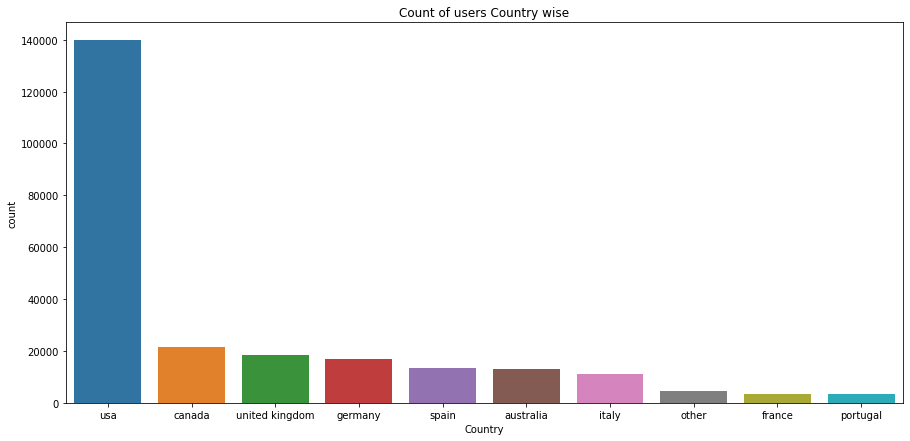

In [39]:
# Barplot to show count of users as per country

plt.figure(figsize=(15,7))
sns.countplot(x='Country',data=users,order=pd.value_counts(users['Country']).iloc[:10].index)
plt.title('Count of users Country wise')

#####**Majority of readers are from USA followed by Canada.**

#**3.2 Books Dataset**

###**Top 10 publishers who have published maximum number of books.**

Text(0.5, 1.0, 'Top 10 Publishers')

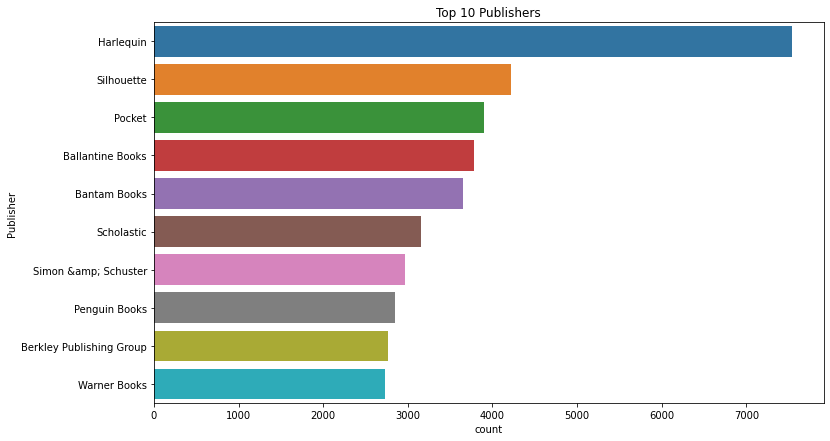

In [40]:
# Barplot to show top 10 publishers.

plt.figure(figsize=(12,7))
sns.countplot(y='Publisher',data=books,order=pd.value_counts(books['Publisher']).iloc[:10].index)
plt.title('Top 10 Publishers')

######**Harleyquin had published maximum number of books followed by Silhouette.**

####**Top 10 authors who have written the maximum number of books.**

Text(0.5, 1.0, 'Top 10 Authors')

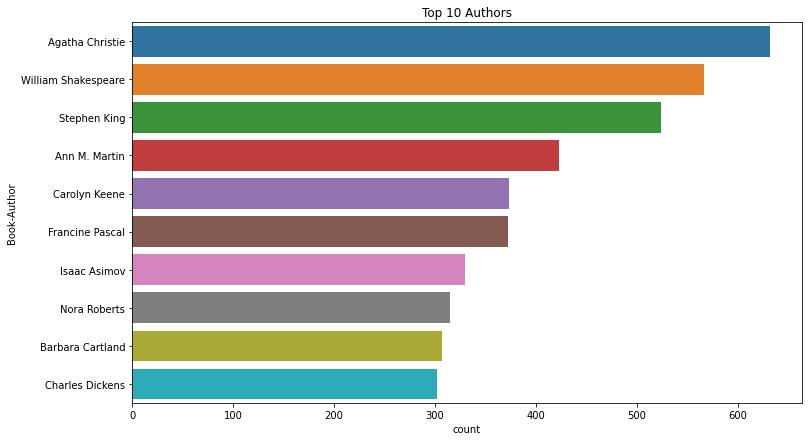

In [41]:
# Barplot to show top 10 authors

plt.figure(figsize=(12,7))
sns.countplot(y='Book-Author',data=books,order=pd.value_counts(books['Book-Author']).iloc[:10].index)
plt.title('Top 10 Authors')

#####**Agatha Christie had written maximum number of books followed by William Shakespeare.**

####**Year-of-Publication column**

In [42]:
# Printing unique values of location column

books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

**Points to note:**

Year-of-Publication column contains some name of publishers.

Also, some values are int and some values are string.

####**It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as Year-Of-Publication in dataset due to some errors in csv file.**

######**First, let's convert all of them into string datatype**

In [43]:
# Converting all values into string

books['Year-Of-Publication']=books['Year-Of-Publication'].astype('str')

#####**Let's explore and clean Year-of-Publication column**

In [44]:
# Investigating the rows having 'DK Publishing Inc' as Year-of-Publication

books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


######**Book Author is incorrectly loaded with Book Title, so let's correct them**

In [45]:
#ISBN '0789466953'
books.loc[books.ISBN == '0789466953','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '0789466953','Book-Author'] = "James Buckley"
books.loc[books.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

#ISBN '078946697X'
books.loc[books.ISBN == '078946697X','Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books.loc[books.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

In [46]:
# Let's check the corrections

books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X'),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [47]:
# Investigating the rows having 'Gallimard' as Year-of-Publication

books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [48]:
# Making required corrections as above, keeping other fields intact

books.loc[books.ISBN == '2070426769','Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.loc[books.ISBN == '2070426769','Publisher'] = "Gallimard"
books.loc[books.ISBN == '2070426769','Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"

In [49]:
# Let's check the corrections

books.loc[books.ISBN == '2070426769',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [50]:
# Converting each values from string to integers

books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

print(sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


**Points to note:**

The value 0 for Year-of-Publication doesn't make any sense.

Years after 2006 are invalid as this dataset was published in 2004.

So, we are setting invalid years as NaN.

Also, considering extreme value as 2006 just to keeping some margin in case dataset was updated thereafter.


In [51]:
# Setting invalid years as NaN

books.loc[(books['Year-Of-Publication'] > 2006) | (books['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [52]:
# Replacing NaNs with median value of Year-Of-Publication

books['Year-Of-Publication'].fillna(round(books['Year-Of-Publication'].median()), inplace=True)

Last three columns contain image URLs which will not be required for analysis.

So, let's drop these columns.

In [53]:
# Dropping last three columns

books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [54]:
# Let's check the no. of null values in Books data

books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

**Null values in Book-Author and Publisher columns. So, let's impute them.**

In [55]:
# Exploring 'publisher' column

books.loc[books.Publisher.isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,NaN


In [56]:
# Filling NaN of Publisher with others

books.Publisher.fillna('other',inplace=True)

In [57]:
# Exploring 'Book-Author' column

books.loc[books['Book-Author'].isnull(),:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995.0,Edinburgh Financial Publishing


In [58]:
# Filling Nan of Book-Author with others

books['Book-Author'].fillna('other',inplace=True)

In [59]:
# Let's check for null values again

books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

**Great! We imputed all null values and our Books dataset is clean now.**

#**3.3 Ratings Dataset**

**Ratings dataset should have books only which exist in our books dataset, unless new books are added to books dataset.**

In [60]:
# Extracting ratings of only available books in books dataset

ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings.shape,ratings_new.shape

((1149780, 3), (1031136, 3))

**Many rows having book ISBN not part of books dataset, got dropped off.**

##**Ratings dataset should have ratings from users which exist in users dataset.**

In [61]:
# Checking if ratings from users are eual to no. of users or not

print("Shape of dataset before dropping",ratings_new.shape)
ratings_new = ratings_new[ratings_new['User-ID'].isin(users['User-ID'])]
print("shape of dataset after dropping",ratings_new.shape)

Shape of dataset before dropping (1031136, 3)
shape of dataset after dropping (1031136, 3)


####**Now let's see the distribution of ratings**

In [ ]:
# Distribution plot of ratings

plt.figure(figsize=(10,8))
plt.rc("font", size=15)
ratings_new['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**The ratings are very unevenly distributed, and the vast majority of ratings are 0.**

**As quoted in the description of the dataset - BX-Book-Ratings contains the book rating information.Ratings are either explicit, expressed on a scale from 1-10 higher values denoting higher appreciation, or implicit, expressed by 0.**

**Hence segragating implicit and explict ratings datasets.**

In [62]:
# Segragating implicit and explict ratings datasets

ratings_explicit = ratings_new[ratings_new['Book-Rating'] != 0]
ratings_implicit = ratings_new[ratings_new['Book-Rating'] == 0]

####**Now let's see the distribution of explicit ratings**

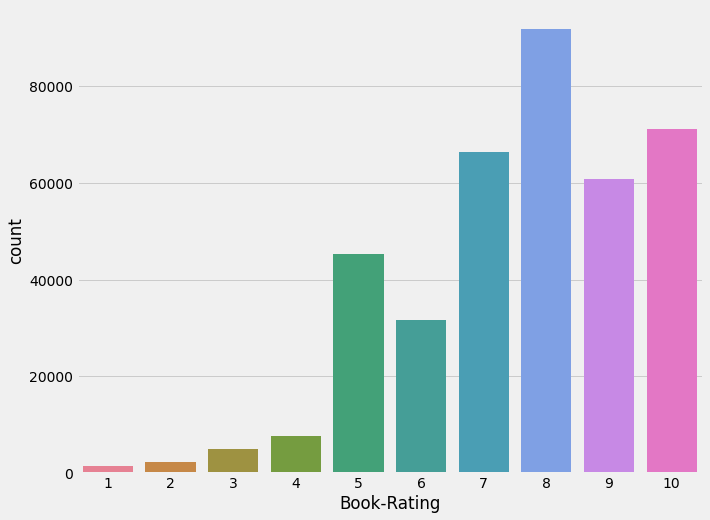

In [63]:
# Distribution of explicit ratings

plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 8))
sns.countplot(data=ratings_explicit , x='Book-Rating', palette='husl')

**It is found that the users rate higher ratings and rating 8 has been rated highest number of times.**

In [64]:
# Top 5 most rated books

rating_count = pd.DataFrame(ratings_explicit.groupby('ISBN')['Book-Rating'].count())
rating_count.sort_values('Book-Rating', ascending=False).head()

,Book-Rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0060928336,320


**The book with ISBN '0316666343' received the most rating counts.**

###**Let’s check name of this book and what books are in the top 5.**

In [65]:
# Names of top rated books

most_rated_books = pd.DataFrame(['0316666343', '0971880107', '0385504209', '0312195516', '0060928336'], index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002.0,"Little, Brown"
1,0971880107,Wild Animus,Rich Shapero,2004.0,Too Far
2,0385504209,The Da Vinci Code,Dan Brown,2003.0,Doubleday
3,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998.0,Picador USA
4,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997.0,Perennial


Considerable points:

The title of most rated book is Alice Sebold’s “The Lovely Bones:A Novel”.

All 5 most rated books are Novels.

So it is conclusive that novels are popular and likely receive more ratings

In [67]:
# Creating column Rating average 

ratings_explicit['Avg_Rating']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('mean')

In [68]:
# Creating column Rating sum

ratings_explicit['Total_No_Of_Users_Rated']=ratings_explicit.groupby('ISBN')['Book-Rating'].transform('count')
ratings_explicit.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


#**4. Merging all Datasets**

In [69]:
# Merging all three datsets together

Final_Dataset=users.copy()
Final_Dataset=pd.merge(Final_Dataset,ratings_explicit,on='User-ID')
Final_Dataset=pd.merge(Final_Dataset,books,on='ISBN')

In [70]:
# Let's take a look at final_dataset

Final_Dataset.head()

,User-ID,Age,Country,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,8,34.746638,canada,0002005018,5,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
1,11676,34.746638,nan,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
2,67544,30.000000,canada,0002005018,8,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
3,116866,34.746638,other,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada
4,123629,34.746638,canada,0002005018,9,7.666667,9,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada


In [71]:
# Shape of Final_Dataset

Final_Dataset.shape

(383842, 11)

In [72]:
# Let's check percentage of null values in each column

missing_values(Final_Dataset)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Age,0,0.0,float64
2,Country,0,0.0,object
3,ISBN,0,0.0,object
4,Book-Rating,0,0.0,int64
5,Avg_Rating,0,0.0,float64
6,Total_No_Of_Users_Rated,0,0.0,int64
7,Book-Title,0,0.0,object
8,Book-Author,0,0.0,object
9,Year-Of-Publication,0,0.0,float64


**Great! 0% null values in Final_Dataset.**

#**5. Popularity Based Filtering**

Popularity based recommendation system works with the trend.

It uses the items which are in trend right now.

It suggest the most popular books to users who just signed up.

It solves the Cold-Start problem.

Book weighted avg formula:

####**Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]**
where,

v is the number of votes for the books.

m is the minimum votes required to be listed in the chart.

R is the average rating of the book.

C is the mean vote across the whole report.

####**Now let's find the values of v,m,R,C.**

In [73]:
# Finding values of C and m.

C= Final_Dataset['Avg_Rating'].mean()
m= Final_Dataset['Total_No_Of_Users_Rated'].quantile(0.90)
Top_Books = Final_Dataset.loc[Final_Dataset['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626700569505161 , m=64.0


(38570, 11)

Here we used 90th percentile as our cutoff.

It means, for a book to feature in the charts, it must have more votes than at least 90% of the books in the list.

There are 38570 books which qualify to be in this list. 

Now, we need to calculate our metric for each qualified book. To do this, we will define a function, weighted_rating() and define a new feature score, of which we’ll calculate the value by applying this function to our DataFrame of qualified books.


In [74]:
# Weighted_rating function to find popular books.

def weighted_rating(x, m=m, C=C):
    v = x['Total_No_Of_Users_Rated']
    R = x['Avg_Rating']
    return (v/(v+m) * R) + (m/(m+v) * C)
    
 
Top_Books['Score'] = Top_Books.apply(weighted_rating,axis=1)
 
 
#Sorting books based on score calculated above
Top_Books = Top_Books.sort_values('Score', ascending=False)

In [75]:
# Keeping only one entry of each book

Top_Books=Top_Books.sort_values('Score', ascending=False).drop_duplicates('ISBN').sort_index()
cm=sns.light_palette('seagreen',as_cmap=True)

In [76]:
# Sorting books based on score calculated above

Top_Books = Top_Books.sort_values('Score', ascending=False)

In [77]:
# Printing the top 5 popular books

Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(5).style.background_gradient(cmap=cm)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.741835
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.716469
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.700403
3,To Kill a Mockingbird,214,8.943925,8.640679
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.609690


**The Popularity based recommender provide a general chart of recommended books to all the users.**

**They are not sensitive to the interests and tastes of a particular user.**

**Harry Potter and the Sorcerer's Stone is rated by maximum no. of users.**

#**6. Collaborative Filtering Recommender**